# Exercise 3 - Spiking neurons

In this exercise you will perform numerical experiments with the leaky integrate-and-fire (LIF) model of spiking neurons, see the slides of lectures 3-4 for details and further references to the Neuronal Dynamics book.

![LIF model](https://icwww.epfl.ch/~gerstner/SPNM/img378.gif)

This type of dynamical neuron model and nonlinear extensions, like the adaptive exponential integrate-and-fire model (Chapter 5 in Neuronal Dynamics), are used in simulations of biological neural networks and are implemented in neuromorphic processors.

Simulators like Brian and Neuronify can be used to quickly configure and simulate networks of LIF neurons. However, in order to develop your understanding of the underlying mechanisms you will explicitly solve the differential equations numerically in this exercise given some sample code included below.

You will also investigate the delta modulator receptor neuron model introduced in lecture 4.

In total there are five tasks to complete.

## Libraries and generic functions

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Function that is used to plot spike times
def rasterplot(ax, x, y, x_label, y_label):
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x, y, marker='|')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

## First implementation of the LIF neuron model

The LIF model is defined by $$\tau_m \frac{du}{dt} = E_L - u + R_m I_{syn}$$
    
where $u=u(t)$ is the membrane potential, $R_m$ is the membrane resistance and $\tau_m$ is the membrane time constant, which is related to the time constant of the RC electric circuit in the illustration above.

$E_L=-65$ mV is the effective leakage potential. Use a threshold membrane potential of $u_{\text th}=-50$ mV and a reset potential of $u_{\text reset}=E_L$. The reset potential is related to the Nernst potential described in the lecture.

$I_{syn}$ is the total input current to the neuron, which is the sum of postsynaptic currents from all synapses on the neuron. This current can also be defined as a constant injection current to investigate the spike frequency of the lif neuron for different input currents. This is what you will do in this first task.

**Task 1:** Complete the code below and plot the spike frequency of a LIF neuron for varying input currents in the range [0, 1000] picoamperes. Compare your result with the illustrations in the slides of lecture 3. Discuss: How can you motivate the rectified linear unit (ReLU) activation function of neural networks based on this result? Can you identify a limitation of the ReLU approximation in cases where the precise timing of spikes is important, like for example in coding and processing of visual stimuli in biology?

In [2]:
E_L     = -65e-3 # Leakage
u_reset = -65e-3 # Reset potential (same as E_L)
u_thres = -50e-3 # Threshold
R       = 90e6   # Resistance
tau_m   = 30e-3  # Membrane time constant

During one second of time 19 spikes were generated for an input current of 100 pA


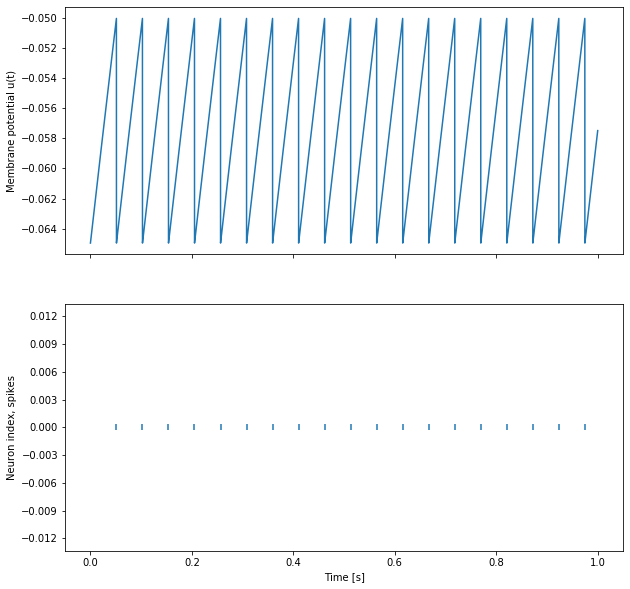

In [3]:
I_syn = 100e-12  # Current sum

t = 0
dt = 1e-4  # A timestep of 0.1 milliseconds is sufficient for this model
u = u_reset

t_i = []
u_i = []
t_spike = []
n_spike = []

while t <= 1:    # Simulate one second of time
    
    # Calculate the finite difference du/dt
    dudt = E_L - u + R*I_syn / tau_m
    
    # Euler forward step is sufficient
    u += dt*dudt
    u_i.append(u)

    # Spiking mechanism
    if u >= u_thres:
        t_spike.append(t)
        n_spike.append(0) # neuron index, only one neuron
        u = u_reset
    
    # Timestep completed
    t_i.append(t)
    t += dt
    
print("During one second of time %d spikes were generated for an input current of %d pA" % (len(t_spike),I_syn/1e-12))
plt.rcParams['figure.figsize'] = [10, 10]
fig,(ax1,ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(t_i,u_i); ax1.set_ylabel('Membrane potential u(t)')
rasterplot(ax2, t_spike, n_spike,'Time [s]','Neuron index, spikes')

During one second of time 0 spikes were generated for an input current of 0 pA
During one second of time 1 spikes were generated for an input current of 10 pA
During one second of time 3 spikes were generated for an input current of 20 pA
During one second of time 10 spikes were generated for an input current of 50 pA
During one second of time 19 spikes were generated for an input current of 100 pA
During one second of time 197 spikes were generated for an input current of 1000 pA


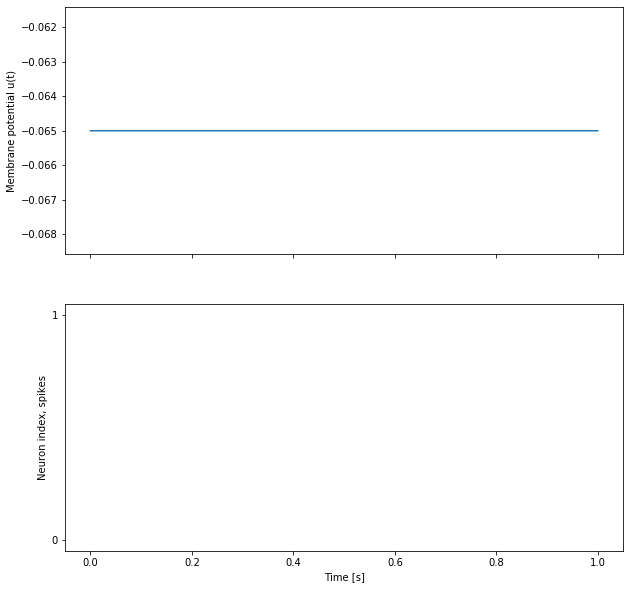

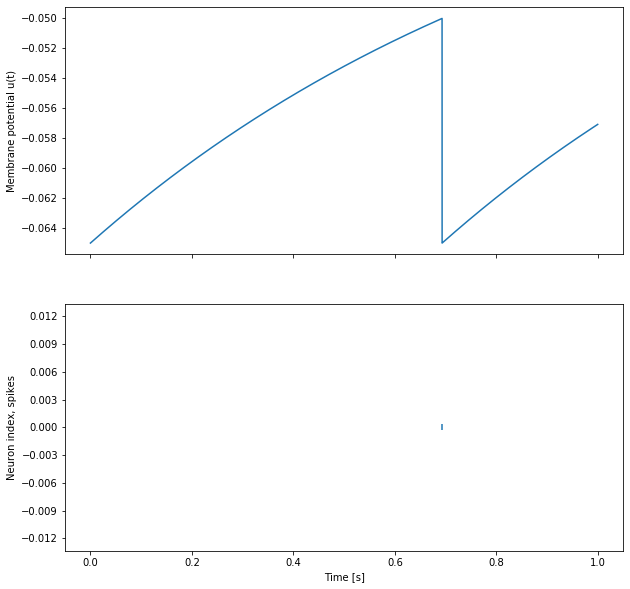

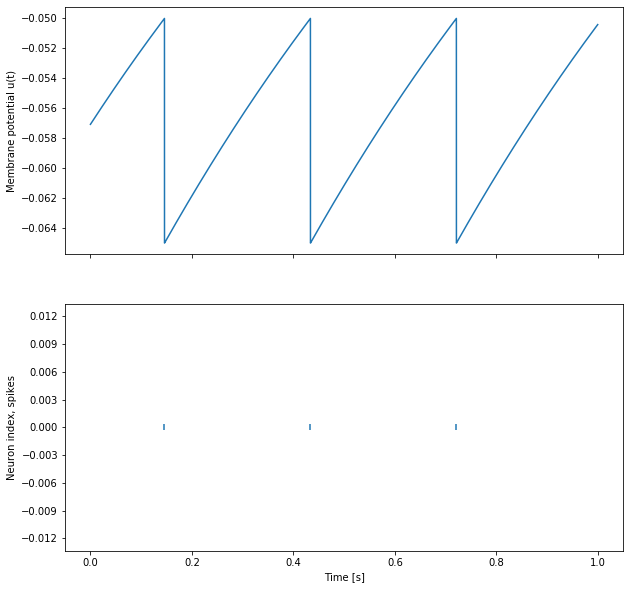

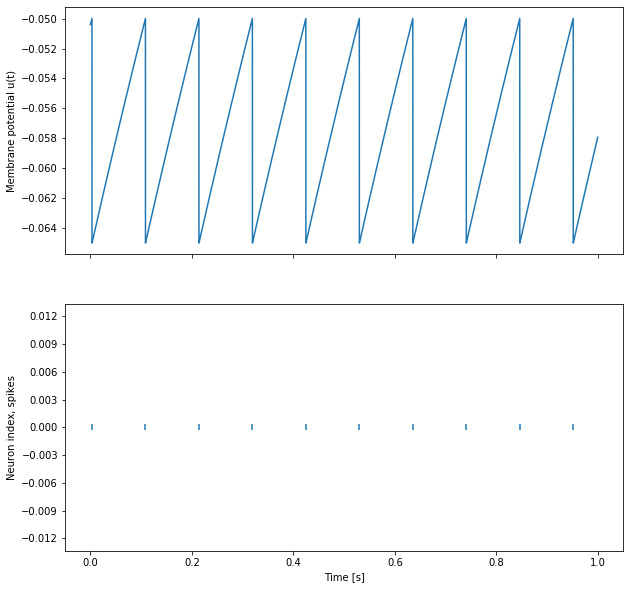

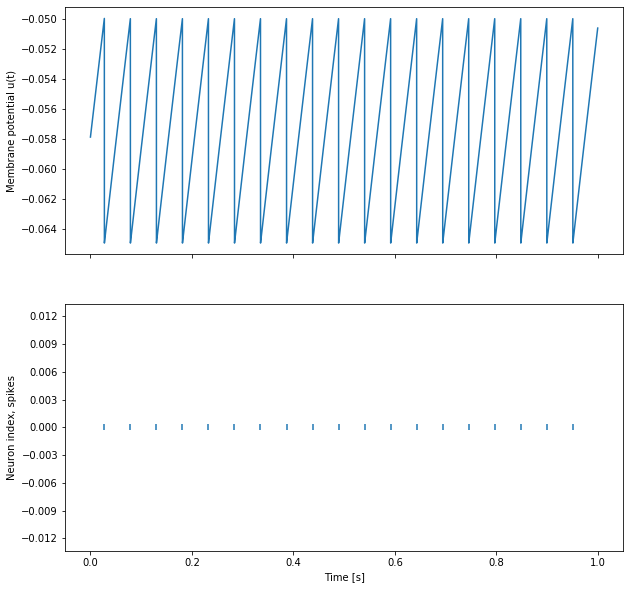

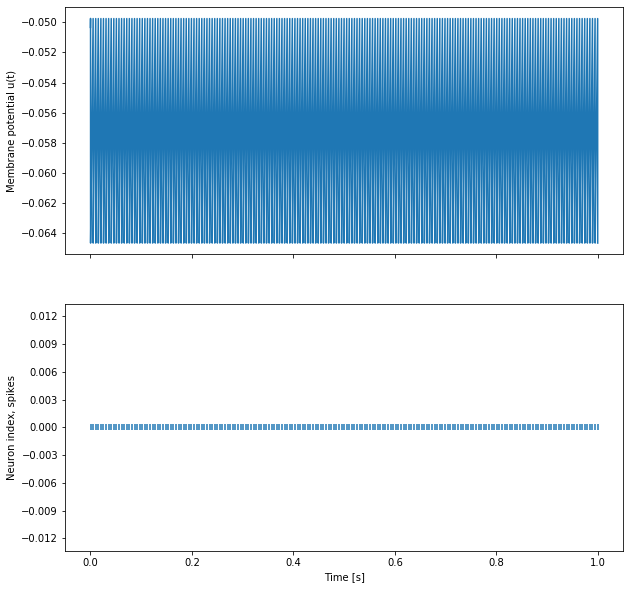

In [4]:
E_L     = -65e-3 # Leakage
u_reset = -65e-3 # Reset potential
u_thres = -50e-3 # Threshold
R       = 90e6   # Resistance
tau_m   = 30e-3  # Membrane time constant


dt = 1e-4  # A timestep of 0.1 milliseconds is sufficient for this model
u = u_reset

for I_syn in [0e-12,10e-12, 20e-12, 50e-12,100e-12,1000e-12]:
    t_i = []
    u_i = []
    t_spike = []
    n_spike = []
    for t in np.arange(0.0,1.0,dt):
        # Calculate the finite difference du/dt
        dudt = E_L - u + R*I_syn / tau_m

        # Euler forward step is sufficient
        u += dt*dudt
        u_i.append(u)

        # Spiking mechanism
        if u >= u_thres:
            t_spike.append(t)
            n_spike.append(0) # neuron index, only one neuron
            u = u_reset

        # Timestep completed
        t_i.append(t)
        t += dt
    print("During one second of time %d spikes were generated for an input current of %d pA" % (len(t_spike),I_syn/1e-12))
    plt.rcParams['figure.figsize'] = [10, 10]
    fig,(ax1,ax2) = plt.subplots(2,1, sharex=True)
    ax1.plot(t_i,u_i); ax1.set_ylabel('Membrane potential u(t)')
    rasterplot(ax2, t_spike, n_spike,'Time [s]','Neuron index, spikes')    

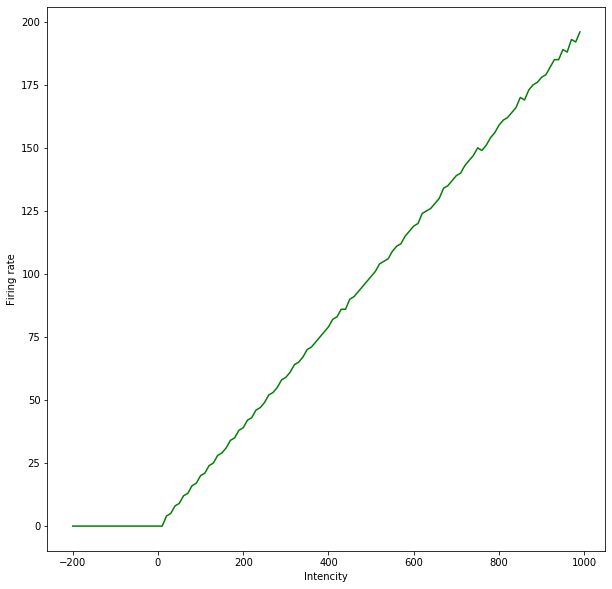

In [5]:
E_L     = -65e-3 # Leakage
u_reset = -65e-3 # Reset potential
u_thres = -50e-3 # Threshold
R       = 90e6   # Resistance
tau_m   = 30e-3  # Membrane time constant


dt = 1e-4  # A timestep of 0.1 milliseconds is sufficient for this model
u = u_reset

freq=[]
intencity=[]
for I_syn in np.arange(-200e-12,1000e-12,10e-12):
    t_i = []
    u_i = []
    t_spike = []
    n_spike = []
    for t in np.arange(0.0,1.0,dt):
        # Calculate the finite difference du/dt
        dudt = E_L - u + R*I_syn / tau_m

        # Euler forward step is sufficient
        u += dt*dudt
        u_i.append(u)

        # Spiking mechanism
        if u >= u_thres:
            t_spike.append(t)
            n_spike.append(0) # neuron index, only one neuron
            u = u_reset

        # Timestep completed
        t_i.append(t)
        t += dt
    freq.append(len(t_spike))
    intencity.append(I_syn/1e-12)
plt.plot(intencity,freq, 'g')
plt.xlabel('Intencity')
plt.ylabel('Firing rate')
plt.show()

## Spiking neural network of LIF neurons 

To enable connection of multiple LIF neurons, and thereby implement spiking neural networks, some more code is needed to manage the propagation of spikes between the interconnected neurons. We also need to implement synapses, which generates a dynamic postsynaptic current when stimulated with a presynaptic spike. For LIF neurons with synapses the input current is the sum of postsynaptic currents. The functions below does that.

In [6]:
def lif_cic_neuron(I_syn, E_L=-65e-3, u_reset=-65e-3, u_thres=-50e-3, R=90e6, tau_m=30e-3):
    # LIF neuron with a constant input current I_syn
    return {
        'type'    : 'lif_cic',
        'u'       : u_reset,                   # Membrane potential [Volt]
        'E_L'     : E_L,                       # Leakage resting potential [Volt]
        'u_reset' : u_reset,                   # Reset potential after spike [Volt]
        'u_thres' : u_thres,                   # Threshold for spike generation [Volt]
        'R'       : R,                         # Membrane resistance [Ohm]
        'tau_m'   : tau_m,                     # Membrane time constant [second]
        'I_syn'   : I_syn,                     # Postsynaptic current [Ampere]
    }

def lif_neuron(num_synapses, E_L=-65e-3, u_reset=-65e-3, u_thres=-50e-3, R=90e6, tau_m=30e-3, tau_syn=50e-3):
    # LIF neuron with dynamic postsynaptic currents
    return {
        'type'    : 'lif',
        'u'       : u_reset,                   # Membrane potential [Volt]
        'E_L'     : E_L,                       # Leakage resting potential [Volt]
        'u_reset' : u_reset,                   # Reset potential after spike [Volt]
        'u_thres' : u_thres,                   # Threshold for spike generation [Volt]
        'R'       : R,                         # Membrane resistance [Ohm]
        'tau_m'   : tau_m,                     # Membrane time constant [second]
        'tau_syn' : tau_syn,                   # Synapse time constant [second] (can also be an array)
        'I_syn'   : np.zeros(num_synapses),    # Postsynaptic currents [Ampere]
        'w_syn'   : np.zeros(num_synapses)     # Synaptic weights [Ampere]
    }

def integrate(dt, t, neurons):
    # Integrate the membrane potential, postsynaptic currents etc one timestep dt
    for n in neurons:
        if n['type'] == 'lif_cic':
            # Integrate membrane potential, like in the first task above
            dudt = (n['E_L'] - n['u'] + n['R']*n['I_syn']) / n['tau_m']
            n['u'] += dt*dudt
        elif n['type'] == 'lif':
            # Integrate array of postsynaptic currents, one current for each synapse
            didt = np.divide(-n['I_syn'], n['tau_syn'])
            n['I_syn'] += dt*didt
            # Integrate membrane potential
            dudt = (n['E_L'] - n['u'] + n['R']*sum(n['I_syn'])) / n['tau_m']
            n['u'] += dt*dudt

def spikegen(dt, t, neurons):
    # Implement the non-linear spike generation mechanisms
    spikes = []
    for i,n in enumerate(neurons):
        if n['type'] in ['lif_cic','lif']:
            if n['u'] > n['u_thres']:
                n['u'] = n['u_reset']
                spikes.append(i)
    return spikes

def update(dt, t, neurons, connections):
    # Update the state of a spiking neural network by calling the functions above
    spikes = spikegen(dt, t, neurons)
    for (post, syn, pre) in connections:
        for spike in spikes:
            # Propagate the spikes, add weight to postsynaptic current
            if spike == pre:
                if neurons[post]['type'] == 'lif':
                    neurons[post]['I_syn'][syn] += neurons[post]['w_syn'][syn]
                else:
                    print('Error: Spike sent to neuron type without synapses')
    integrate(dt, t, neurons)
    return spikes

### Define a population of neurons

In [7]:
n0 = lif_cic_neuron(200e-12);        # LIF neuron with constant input current of 200 pA

n1 = lif_neuron(1);                  # LIF neuron with one dynamic synapse
n2 = lif_neuron(2);                  # LIF neuron with two dynamic synapses

neurons = [n0, n1, n2]               # A population of three neurons

### Connect the neurons

Given an array of neurons each connection between two neurons is defined by three integers:

0. The index of the postsynaptic neuron (the destination), here referred to as 'post'.
1. The index of the synapse on the postsynaptic neuron, here referred to as 'syn'.
2. The index of the presynaptic neuron (the source), here referred to as 'pre'.

Thus, an array defining all connections has the following structure  

    connections = [[post,syn,pre], [post,syn,pre], ... ]

Each triplet [post, syn, pre] configures one connection between two neurons via one synapse

$$post : syn \leftarrow  pre$$

In [8]:
connections = [[1,0,0],    # n1 receives spikes from n0 on synapse 0
               [2,0,0],    # n2 receives spikes from n0 on synapse 0
               [2,1,1]]    # n2 also receives spikes from n1 on synapse 1

n1['w_syn'][0] = 300e-12   # Excitatory synapse with weight 300 pA

n2['w_syn'][0] = 300e-12   # Excitatory synapse with weight 300 pA
n2['w_syn'][1] = -100e-12  # Inhibitory synapse with weight -100 pA

### Integrate equations over time

Integrate the equations describing the dynamics of neurons and synapses over time and store any variables needed for plotting at each time step. Observe that the neurons are stateful, you have to re-run the cell above where the neuron population is defined to reset the simulation.

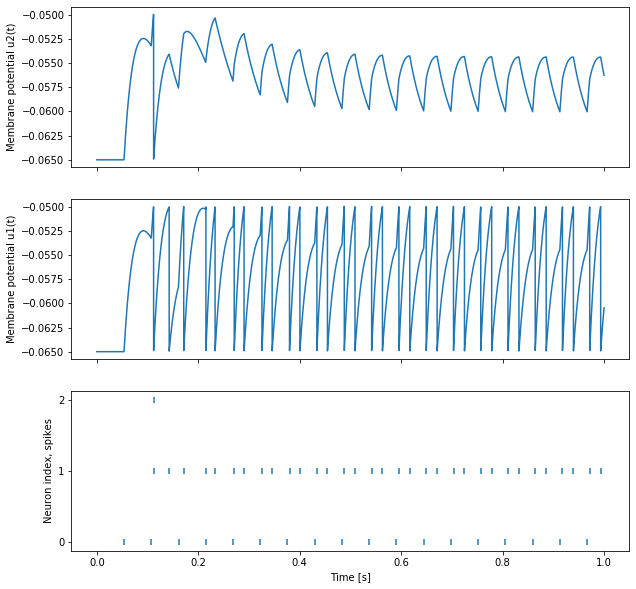

In [9]:
t = 0
dt = 1e-4

t0 = t
tv = []
u1 = []
u2 = []
t_spike = []
n_spike = []

while t < 1:

    spikes = update(dt, t, neurons, connections)
    
    # Store membrane potentials of n1 and n2 for plotting/analysis
    tv.append(t)
    u1.append(n1['u'])
    u2.append(n2['u'])
    
    # Store spikes needed for plotting/analysis
    if len(spikes)>0:
        for s in spikes:
            t_spike.append(t)
            n_spike.append(s)

    # Timestep completed
    t += dt
    
fig,(ax1,ax2,ax3) = plt.subplots(3,1, sharex=True)
ax1.plot(tv,u2); ax1.set_ylabel('Membrane potential u2(t)')
ax2.plot(tv,u1); ax2.set_ylabel('Membrane potential u1(t)')
rasterplot(ax3, t_spike, n_spike,'Time [s]','Neuron index, spikes')

**Task 2:** How many times does neuron n2 spike in the simulation above, and why does it spike with a lower frequency than n1 although both neurons have excitatory synapses with the same weight?

N2 spikes once because it receives inhibitory signals from N1, which spikes a lot, and hence forbid N2 to spike during the rest of the second.
 
**Task 3.1:** Complete the code below to investigate what happens with the membrane potential of the npost neuron when the synaptic weight is modified? What happens when the input current to the npre neuron is increased to 400 pA? 

When the input current to the npre neuron is doubled from 200 to 400, the frequency of spikes is multiplied.
When synaptic weight is increased the the frequency is also increased but linearly
When it is under 100, the stimulation is insufficient to trigger any spikes 
When it is under 0, we see the potential of the membrane going down showing us the inihibition effect


**Task 3.2:** What happens if the synaptic weight is negative? Discuss: How is the membrane potential affected if there are both excitatory and inhibitory synapses that receives presynaptic spikes?

The neuron sums inputs, e.g. 1 synapse with a w=100 is equivalent to 2 synapses with w1=-100 and w2=200

36 spikes


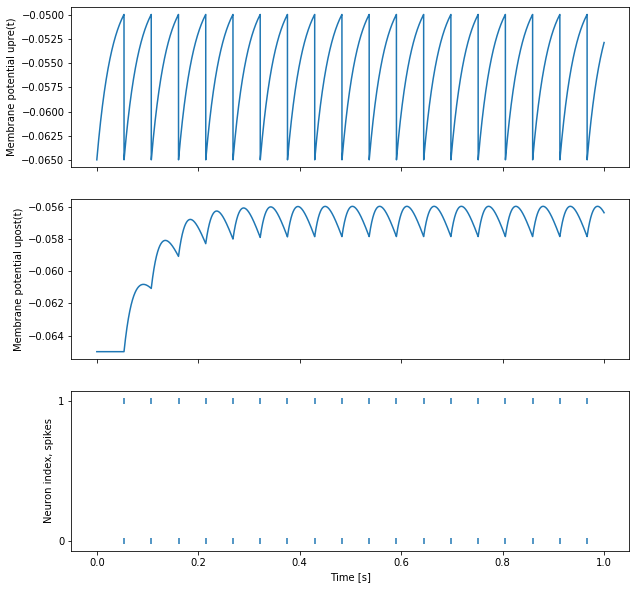

In [10]:
npre = lif_cic_neuron(200e-12);
ninh = lif_cic_neuron(200e-12);

npost = lif_neuron(2);


neurons = [npre, ninh, npost]

connections = [[2,0,0], [2,1,1]] # npost receives spikes from npre on synapse 0

npost['w_syn'][0] = 200e-12  # Excitatory synapse
npost['w_syn'][1] = -100e-12  # Inhibitory synapse


t = 0
dt = 1e-4

t0 = t
tv = []
upre = []
upost = []
t_spike = []
n_spike = []

while t < 1:

    spikes = update(dt, t, neurons, connections)
    
    # Store membrane potentials of n1 and n2 for plotting/analysis
    tv.append(t)
    upre.append(npre['u'])
    upost.append(npost['u'])
    
    # Store spikes needed for plotting/analysis
    if len(spikes)>0:
        for s in spikes:
            t_spike.append(t)
            n_spike.append(s)

    # Timestep completed
    t += dt
    
fig,(ax1,ax2,ax3) = plt.subplots(3,1, sharex=True)
ax1.plot(tv,upre); ax1.set_ylabel('Membrane potential upre(t)')
ax2.plot(tv,upost); ax2.set_ylabel('Membrane potential upost(t)')
rasterplot(ax3, t_spike, n_spike,'Time [s]','Neuron index, spikes')
print("%d spikes" % (len(t_spike)))

**Task 4:** Define a new neuron population with new connections by completing the code below. Investigate what happens when one LIF neuron called nsum receives spike inputs from multiple LIF neurons with constant input currents (lif_cic neurons) of I_syn = 200 pA. What is the spike rate of nsum for one input, two inputs, three inputs etc? Use excitatory synapses with weights 300 pA. 


What does this result suggest?
It is proportional.

209 spikes


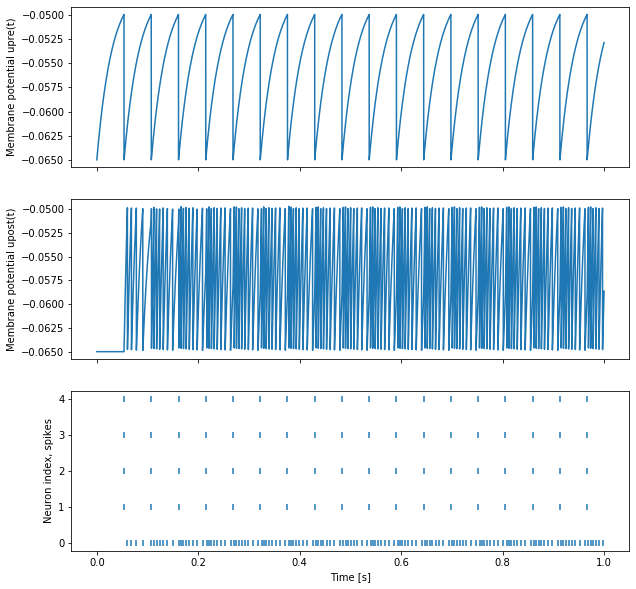

In [11]:
N = 4

nin = [lif_cic_neuron(200e-12) for _ in range(N)]

nsum = lif_neuron(N+1);
for i in range(N):
    nsum['w_syn'][i] = 300e-12

neurons = [nsum] + nin

connections = [[0,i+1,i+1] for i in range(N)]


t = 0
dt = 1e-4

t0 = t
tv = []
upre = []
upost = []
t_spike = []
n_spike = []

while t < 1:

    spikes = update(dt, t, neurons, connections)
    
    # Store membrane potentials of n1 and n2 for plotting/analysis
    tv.append(t)
    upre.append(nin[0]['u'])
    upost.append(nsum['u'])
    
    # Store spikes needed for plotting/analysis
    if len(spikes)>0:
        for s in spikes:
            t_spike.append(t)
            n_spike.append(s)

    # Timestep completed
    t += dt
    
fig,(ax1,ax2,ax3) = plt.subplots(3,1, sharex=True)
ax1.plot(tv,upre); ax1.set_ylabel('Membrane potential upre(t)')
ax2.plot(tv,upost); ax2.set_ylabel('Membrane potential upost(t)')
rasterplot(ax3, t_spike, n_spike,'Time [s]','Neuron index, spikes')
print("%d spikes" % (len(t_spike)))

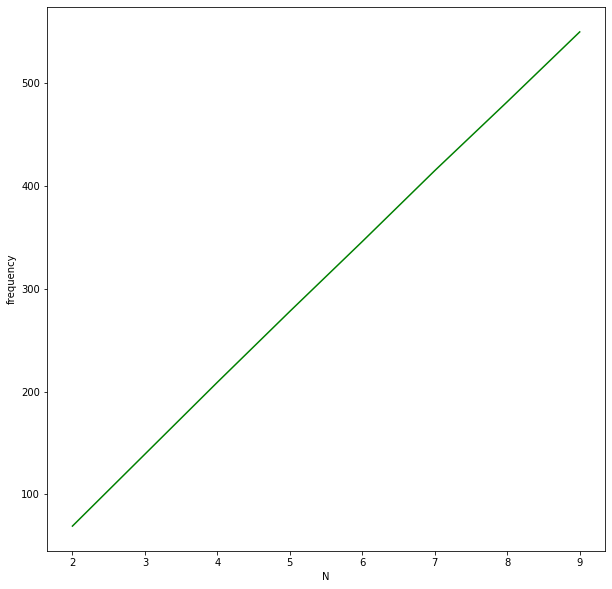

In [12]:
r = range(2,10)
f = []
for N in r:
    nin = [lif_cic_neuron(200e-12) for _ in range(N)]

    nsum = lif_neuron(N+1);
    for i in range(N):
        nsum['w_syn'][i] = 300e-12

    neurons = [nsum] + nin

    connections = [[0,i+1,i+1] for i in range(N)]


    t = 0
    dt = 1e-4

    t0 = t
    tv = []
    upre = []
    upost = []
    t_spike = []
    n_spike = []

    while t < 1:

        spikes = update(dt, t, neurons, connections)

        # Store membrane potentials of n1 and n2 for plotting/analysis
        tv.append(t)
        upre.append(nin[0]['u'])
        upost.append(nsum['u'])

        # Store spikes needed for plotting/analysis
        if len(spikes)>0:
            for s in spikes:
                t_spike.append(t)
                n_spike.append(s)

        # Timestep completed
        t += dt
        
    f.append(len(t_spike))
plt.plot(r, f, 'g')
plt.ylabel('frequency')
plt.xlabel('N')
plt.show()

**Optional task:** Can you implement another spiking neural network example available in the Neuronify app using this code? Task 4 is inspired by one of the examples, which one?

This task look a lot like the example "input summation".

51
32


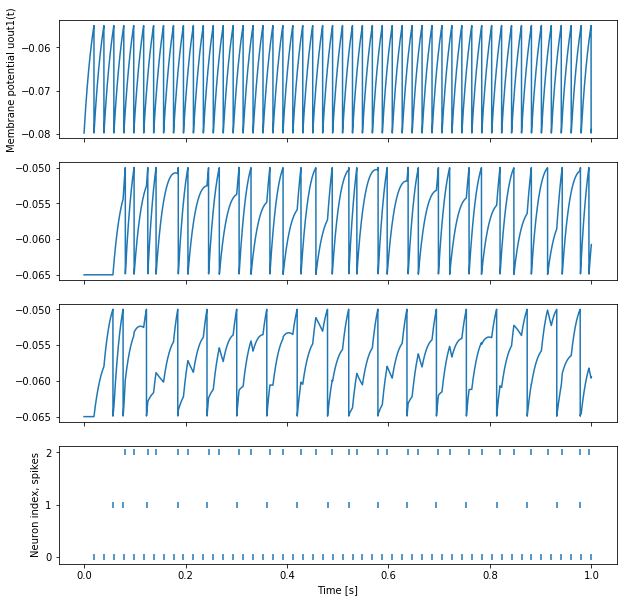

In [38]:
# Feedback inhibition
n_in = lif_cic_neuron(300e-12, E_L=-70e-3, u_reset=-80e-3, u_thres=-55e-3, R=100e6, tau_m=20e-3);

n_out = lif_neuron(2)
n_out['w_syn'][0] = 200e-12
n_out['w_syn'][1] = -200e-12

n_feedback = lif_neuron(1)
n_feedback['w_syn'][0] = 300e-12

neurons = [n_in, n_out, n_feedback]

connections = [
    [1,0,0], #n_out receive from n_in on synapps 0
    [1,1,2], #n_out receive from n_feedback on synapps 1
    [2,0,1], #n_feedback receive from n_out on synapps 0
]

t = 0
dt = 1e-4

t0 = t
tv = []

uin = []
uout = []
ufb = []

t_spike = []
n_spike = []

while t < 1:

    spikes = update(dt, t, neurons, connections)
    
    # Store membrane potentials of n1 and n2 for plotting/analysis
    tv.append(t)
    uin.append(n_in['u'])
    ufb.append(n_feedback['u'])
    uout.append(n_out['u'])

    # Store spikes needed for plotting/analysis
    if len(spikes)>0:
        for s in spikes:
            t_spike.append(t)
            n_spike.append(s)

    # Timestep completed
    t += dt
    
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1, sharex=True)
ax1.plot(tv,uin); ax1.set_ylabel('Membrane potential uin(t)')
ax2.plot(tv,ufb); ax1.set_ylabel('Membrane potential uinhib(t)')
ax3.plot(tv,uout); ax1.set_ylabel('Membrane potential uout1(t)')
rasterplot(ax4, t_spike, n_spike,'Time [s]','Neuron index, spikes')
print(len([i for i in n_spike if i==0]))
print(len([i for i in n_spike if i==2]))

## Delta modulator sensory neuron model

Sensory neurons convert a specific type of stimulus like light, sound or touch intensity into action potentials (or in some cases also graded non-spiking potentials not further discussed here). This process is called sensory transduction. Refer to https://en.wikipedia.org/wiki/Sensory_neuron for a an overview.

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/1/17/Structure_of_sensory_system_%284_models%29_E.PNG" width="400"/>
</div>

Neural encoding concerns the map from stimulus to response. Investigating how neurons respond to different stimuli, and construction of models that predict the responses for novel stimuli (generalization); https://en.wikipedia.org/wiki/Neural_coding

In this task you will investigate the delta modulator model, which is introduced in the lecture about sensory systems. This model can be used to convert recorded time-dependent stimuli, like light or sound intensity, to a sequence of spikes.

### Encoder function

The delta modulator encodes one time-varying signal in two spiketrains representing positive and negative amplitude changes in discrete steps $\pm\delta_y$. The amplitude resolution and average spikerate depends on the parameter $\delta_y$. This is similar to pulse interval/frequency modulation, which may be familiar if you have studied digital communication.

The encoder defined below generates up and down spikes from an input sequence $y_i(t_i)$. Whenever the amplitude $y$ has increased by an amount $\delta_y$ an up spike is generated. If the amplitude $y$ decreases by an amount $\delta_y$ a down spike is generated. The list of generated up and down spikes are returned from the encoder function.

In [14]:
def delta_encode(t,y,deltay):
    
    # Arrays of spike times
    t_up = []
    t_dn = []
    
    # Initial values of time and signal amplitude y
    tprev = t[0];
    yprev = y[0];
    
    # For each time step and signal amplitude value
    for ti, yi in zip(t[1:], y[1:]):

        # Amplitude change since last spike
        dy = yi - yprev
        
        # Number of spikes generated 
        nspikes = int(dy / deltay) # round towards zero
        
        # Generate up/down spike times
        if nspikes != 0:
        
            # Time step between spikes
            dt = abs(deltay / dy) * (ti - tprev)
            
            # Append spike times to the arrays
            if nspikes > 0:
                t_up.append(np.arange(1,1+nspikes)*dt + tprev)
                tprev = t_up[-1]
            elif nspikes < 0:
                t_dn.append(np.arange(1,1-nspikes)*dt + tprev)
                tprev = t_dn[-1]
            
            # Update the y value corresponding to the last (previous) spike
            yprev += nspikes*deltay
            
    return t_up, t_dn

### Encoding a sine wave

In this example we encode a sine wave with the delta modulator and visualize the resulting up and down spike times.

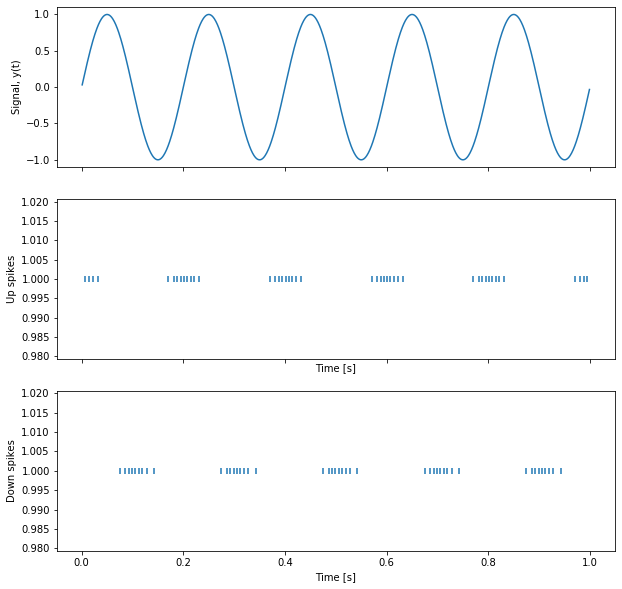

In [15]:
# Define time array t
dt = 1e-3                  # 1 millisecond steps
t = np.arange(1,1000)*dt

# Define 5 Hz sine wave y(t)
frequency = 5
omega = 2.0*3.1415*frequency
y = np.sin(omega*t)

# Encode signal y(t) with spike times using the delta modulator
dy = 0.2
(t_up, t_dn) = delta_encode(t,y,dy)

# Plot the result
fig,(ax1,ax2,ax3) = plt.subplots(3,1, sharex=True)
ax1.plot(t,y); ax1.set_ylabel('Signal, y(t)');
rasterplot(ax2, t_up, np.ones(len(t_up)),'Time [s]','Up spikes')
rasterplot(ax3, t_dn, np.ones(len(t_dn)),'Time [s]','Down spikes')

### Decoding

Neural decoding refers to the reverse map, from response to stimulus. The challenge is to reconstruct a stimulus, or certain aspects of that stimulus, from the spike sequences it produces.

To decode the sequence of up- and down spikes generated by the delta modulator encoder into a time-varying signal $y_i(t_i)$ the process is reversed by the operations $y = y+\delta_y$ at the time of every up spike and $y = y-\delta_y$ at the time of every down spike.

In [16]:
def delta_decode(deltay, t_up, t_dn):
    t = [0]
    y = [0]
    i=j=0
    while 1:
        if i < len(t_up) and j < len(t_dn):
            if all(t_up[i] < t_dn[j]):
                y.append(y[-1]+deltay)
                t.append(t_up[i])
                i += 1
            elif all(t_dn[j] < t_up[i]):
                y.append(y[-1]-deltay)
                t.append(t_dn[j])
                j += 1
        elif i < len(t_up):
            y.append(y[-1]+deltay)
            t.append(t_up[i])
            i += 1
        elif j < len(t_dn):
            y.append(y[-1]-deltay)
            t.append(t_dn[j])
            j += 1
        else:
            break
            
    return t, y

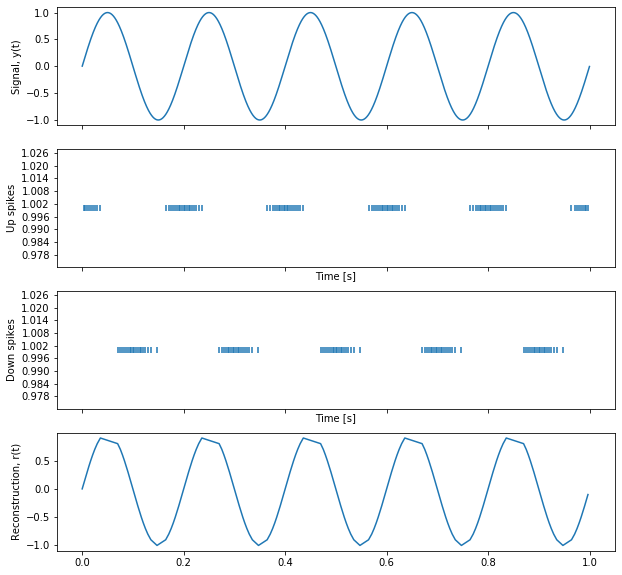

In [17]:
# Time array t
dt = 1e-4                  # 0.1 millisecond steps
t = np.arange(1,10000)*dt

# 5 Hz sine wave y(t)
frequency = 5
omega = 2.0*3.1415*frequency
y = np.sin(omega*t)

# Encode signal y(t) with spike times using the delta modulator
dy = 0.1
(t_up, t_dn) = delta_encode(t, y, dy)

# Reconstruct signal with decoder
(tr, yr) = delta_decode(dy, t_up, t_dn)

# Plot the result
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1, sharex=True)
ax1.plot(t,y); ax1.set_ylabel('Signal, y(t)');
rasterplot(ax2, t_up, np.ones(len(t_up)),'Time [s]','Up spikes')
rasterplot(ax3, t_dn, np.ones(len(t_dn)),'Time [s]','Down spikes')
ax4.plot(tr,yr); ax4.set_ylabel('Reconstruction, r(t)');

**Task 5:** Extend the following code and plot the mean square error of the reconstruction versus $\delta_y$, and also the mean square error of the reconstruction versus the average frequency of up and down spikes.

### Task 5.2 : Error / delta Y

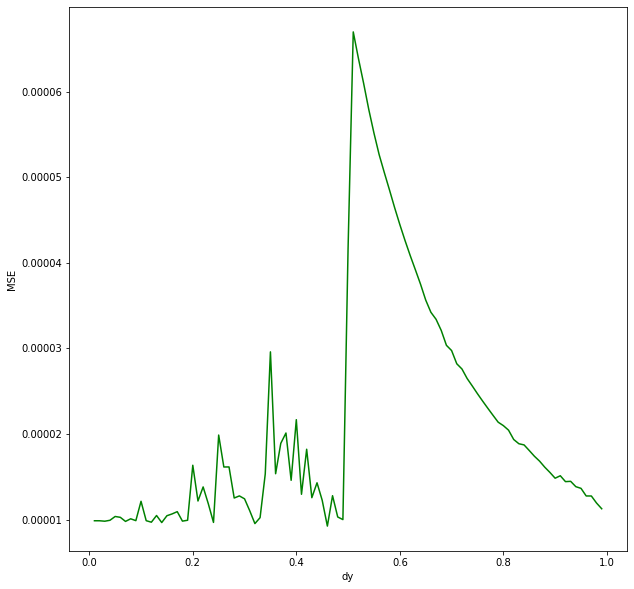

In [18]:
# Time array t
dt = 1e-4                  # 0.1 millisecond steps
t = np.arange(1,10000)*dt
dy = 0.1

mse = []
freq = 5
omega = 2.0*3.1415*freq
y = np.sin(omega*t)
dys = [r for r in np.arange(0.01,1,0.01)]

# 5 Hz sine wave y(t)
for dy in dys:
    (t_up, t_dn) = delta_encode(t, y, dy)
    (tr, yr) = delta_decode(dy, t_up, t_dn)
    y2 = np.sin(omega * np.array(tr).astype(float))
    mse.append(np.square(y2-yr).mean())
    
# Plot the resultnspikes
plt.plot(dys, mse, 'g')
plt.xlabel('dy')
plt.ylabel('MSE')
plt.show()

### Task 5.1 : Error / freq

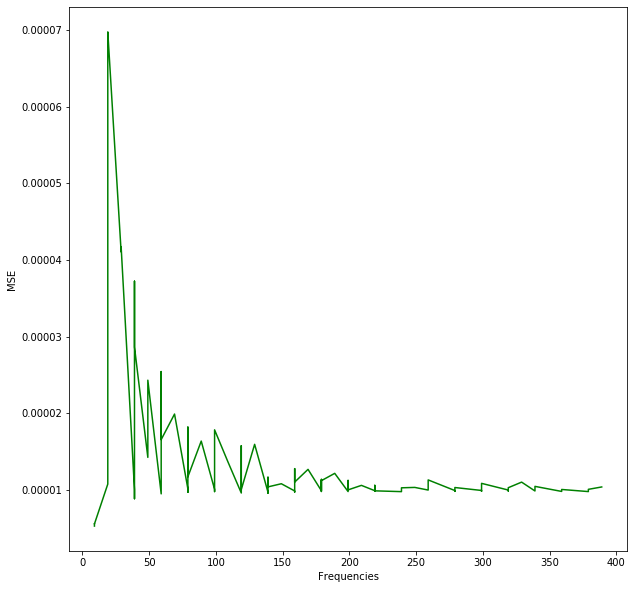

In [19]:
# Time array t
dt = 1e-4                  # 0.1 millisecond steps
t = np.arange(1,10000)*dt
dy = 0.1

mse = []
freq = 5
omega = 2.0*3.1415*freq
y = np.sin(omega*t)
dys = [r for r in np.arange(0.05,1,0.001)]
frequencies = []

# 5 Hz sine wave y(t)
for dy in dys:
    (t_up, t_dn) = delta_encode(t, y, dy)
    frequencies.append(len(t_up)+len(t_dn))
    (tr, yr) = delta_decode(dy, t_up, t_dn)
    y2 = np.sin(omega * np.array(tr).astype(float))
    mse.append(np.square(y2-yr).mean())
    
# Plot the resultnspikes
plt.plot(frequencies, mse, 'g')
plt.xlabel('Frequencies')
plt.ylabel('MSE')
plt.show()

### Remarks

The details of neuronal coding in biology are only partially understood, see Neuronal Dynamics Section 7.6 and https://en.wikipedia.org/wiki/Neural_coding. There is more to learn and study beyond the basic concept of this delta modulator model.

The delta modulator has been implemented in hardware for recording of e.g. membrane potentials of biological neurons via electrodes inserted into the brain, see https://doi.org/10.1109/TBCAS.2015.2479256, and it is implemented in prototype neuromorphic processors as an interface between analog peripherals and the spiking neural network processor. A similar mechanism is used in neuromorphic vision sensors.